Very fast calculations of battery life can be made using some simpifications. For instance, if the operation of the battery is assumed to be unchanging, i.e., every 'cycle' is exactly repeated for the battery's entire life, then we can simply calculate the stress of this cycle on the battery once (which is usually the more computationally expensive step), and then calculate the degradation of repeating that stress however many times is desired very rapidly. Note that this assumption means that both temperature and state-of-charge vectors are assumed to stay constant, so we cannot handle climate variation using this approach.

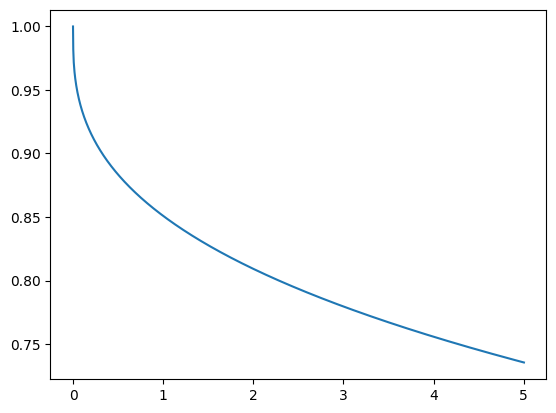

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from blast.models import Nmc111_Gr_Kokam75Ah_Battery

# Define an extremely simple example: storage at 80% state-of-charge and 45 degrees C
# We only need to specify the state-of-charge and temperature for one 'period', which could be a cycle, or here, one day.
inputs = {
    "Time_s": np.array([0, 86399]),
    "SOC": np.array([0.8, 0.8]),
    "Temperature_C": np.array([45, 45])
}

battery = Nmc111_Gr_Kokam75Ah_Battery()
# By setting the 'is_constant_input' argument to true, the input is automatically repeated until it hits simulation_years
battery.simulate_battery_life(inputs, simulation_years=5, is_constant_input=True)

plt.plot(battery.stressors['t_days']/365, battery.outputs['q'])